<a href="https://colab.research.google.com/github/Mark-Kinyua/Task1_ML_Group2/blob/main/group_task2_ML_ICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
%matplotlib inline


In [3]:
from google.colab import files
# Importing of data (modified_data.csv)
uploaded = files.upload()

Saving modified_data.csv to modified_data.csv


In [25]:
# Placing csv into a dataframe
df = pd.read_csv(io.BytesIO(uploaded['modified_data.csv']))
data=pd.DataFrame(df)

# Show  loaded data
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [26]:
# First 5 rows 
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [27]:
# Dimensions of dataset
data.shape

(1460, 77)

**Data Preprocessing**

In [28]:
#The Id column may not be all too relevant, hence dropping it.
data.drop('Id', axis=1, inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [51]:
initial_features = list(data.columns)

In [29]:
# Checking for missing values in the dataset
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

In [30]:
# Using percentage values
100* data.isnull().sum()/len(data)

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 76, dtype: float64

 *Looking more into the features*


In [31]:
feats = list(data.columns) # list structure of features
len(feats)# size of the list object (number of columns)

76

In [32]:
features_with_missing_data = list(data.columns[data.isna().any()]) # list object of features (columns) with missing data
len(features_with_missing_data) # size of list object (number of columns with missing values)

15

In [33]:
# list the all features with missing data against their percentage values 
for i in features_with_missing_data:
    print(i, ' ', 100* data[i].isnull().sum()/len(data))

LotFrontage   17.73972602739726
MasVnrType   0.547945205479452
MasVnrArea   0.547945205479452
BsmtQual   2.5342465753424657
BsmtCond   2.5342465753424657
BsmtExposure   2.6027397260273974
BsmtFinType1   2.5342465753424657
BsmtFinType2   2.6027397260273974
Electrical   0.0684931506849315
FireplaceQu   47.26027397260274
GarageType   5.5479452054794525
GarageYrBlt   5.5479452054794525
GarageFinish   5.5479452054794525
GarageQual   5.5479452054794525
GarageCond   5.5479452054794525


In [34]:
# Dropping features with more than 50% missing data
data.dropna(axis=1, thresh=0.5 * (len(data)), inplace=True)

**Filling in missing values Using backward and forward filing**

In [35]:
mean_fill=['LotFrontage', 'MasVnrArea']
bfill_data = ['FireplaceQu']
ffill_data = list(set(features_with_missing_data)-set(mean_fill)-set(bfill_data))

In [36]:
ffill_data

['MasVnrType',
 'GarageYrBlt',
 'BsmtFinType1',
 'GarageQual',
 'GarageCond',
 'GarageFinish',
 'Electrical',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'GarageType',
 'BsmtFinType2']

In [37]:
for i in mean_fill:
    data[i].fillna(data[i].mean(), inplace=True)

In [38]:
# Backward filing
for j in bfill_data:
    data[j].fillna(method = 'bfill', inplace=True)

In [41]:
# Forward filing
for k in ffill_data:
    data[k].fillna(method = 'ffill', inplace=True)

In [40]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

Encoding the Dataset
This will ensure the model does not put weights to what need not weighting.
List all non-numeric columns

Extract Categorical Data

In [45]:
categorical_features = list(data.select_dtypes(include=['object']).copy().columns)

In [44]:
categorical_features[:5]

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities']

In [49]:
len(categorical_features)

39

In [52]:
# NOT SURE

nom_data=['MSZoning', 'LandContour', 'LotConfig','Neighborhood','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','BsmtFinType1','CentralAir']
ord_data = list(set(categorical_features)-set(nom_data))
num_data = list(set(initial_features)-set(categorical_features))
target = ['SalePrice']

In [54]:
# NOT SURE

data[num_data]

,TotRmsAbvGrd,MiscVal,BedroomAbvGr,MasVnrArea,OverallQual,BsmtFullBath,MSSubClass,BsmtHalfBath,ScreenPorch,OpenPorchSF,...,HalfBath,EnclosedPorch,YearBuilt,MoSold,LotArea,Fireplaces,GarageCars,YrSold,3SsnPorch,TotalBsmtSF
0,8,0,3,196.0,7,1,60,0,0,61,...,1,0,2003,2,8450,0,2,2008,0,856
1,6,0,3,0.0,6,0,20,1,0,0,...,0,0,1976,5,9600,1,2,2007,0,1262
2,6,0,3,162.0,7,1,60,0,0,42,...,1,0,2001,9,11250,1,2,2008,0,920
3,7,0,3,0.0,7,1,70,0,0,35,...,0,272,1915,2,9550,1,3,2006,0,756
4,9,0,4,350.0,8,1,60,0,0,84,...,1,0,2000,12,14260,1,3,2008,0,1145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7,0,3,0.0,6,0,60,0,0,40,...,1,0,1999,8,7917,1,2,2007,0,953
1456,7,0,3,119.0,6,1,20,0,0,0,...,0,0,1978,2,13175,2,2,2010,0,1542
1457,9,2500,4,0.0,7,0,70,0,0,60,...,0,0,1941,5,9042,2,1,2010,0,1152
1458,5,0,2,0.0,5,1,20,0,0,0,...,0,112,1950,4,9717,0,1,2010,0,1078


In [55]:
for i in ord_data:
    data[i] = (data[i].astype('category')).cat.codes

In [56]:
df_ord = data[ord_data]

Implementing One Hot Encoding This is for the norminal data

In [58]:
df_nom = pd.get_dummies(data[nom_data])

Putting the data back together

In [59]:
df_num = data[num_data]

In [60]:
joined_data = pd.concat([df_num, df_nom, df_ord], axis=1)

In [61]:
joined_data.head()

,TotRmsAbvGrd,MiscVal,BedroomAbvGr,MasVnrArea,OverallQual,BsmtFullBath,MSSubClass,BsmtHalfBath,ScreenPorch,OpenPorchSF,...,ExterCond,LandSlope,LotShape,Condition2,HeatingQC,Electrical,GarageFinish,BsmtCond,GarageType,BsmtFinType2
0,8,0,3,196.0,7,1,60,0,0,61,...,4,0,3,2,0,4,1,3,1,5
1,6,0,3,0.0,6,0,20,1,0,0,...,4,0,3,2,0,4,1,3,1,5
2,6,0,3,162.0,7,1,60,0,0,42,...,4,0,0,2,0,4,1,3,1,5
3,7,0,3,0.0,7,1,70,0,0,35,...,4,0,0,2,2,4,2,1,5,5
4,9,0,4,350.0,8,1,60,0,0,84,...,4,0,0,2,0,4,1,3,1,5


Standardize the dataset

In [64]:
scaler = StandardScaler()

In [65]:
df_X = joined_data.drop('SalePrice', axis=1)
X = np.array(df_X)

In [66]:
df_y = data[target]
y = np.array(df_y)

In [67]:
X.shape

(1460, 162)

In [68]:
y.shape

(1460, 1)

In [69]:
X=scaler.fit_transform(X)
y=scaler.fit_transform(y)

***Feature Selection using L1***

In [70]:
regressor = LassoCV()
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

L1 selected only  77  features out of  162  from the transformed dataset 


Text(0.5, 1.0, 'Feature Selection Using L1 Embedder')

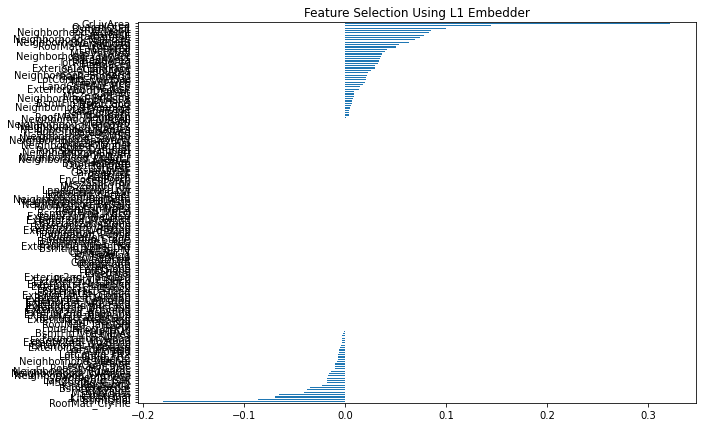

In [71]:
#print(regressor.coef_)
coef_col = pd.Series(regressor.coef_,index=df_X.columns)

#print(coef_col)
sorted_coef = coef_col.sort_values()
plt.rcParams['figure.figsize']=(10.0,7.0)
sorted_coef.plot(kind="barh")

no_of_selected_features = sum(coef_col != 0)
no_of_rejected_features = sum(coef_col == 0)
total_features = no_of_selected_features + no_of_rejected_features
print("L1 selected only ",no_of_selected_features," features out of ",total_features," from the transformed dataset ")
plt.title("Feature Selection Using L1 Embedder")

***Retrieve the selected features***

In [72]:
selected_features_list = []
for label, value in zip(coef_col.index, coef_col.values):
    if value != 0:
        selected_features_list.append(label)

selected_features_list

['TotRmsAbvGrd',
 'BedroomAbvGr',
 'MasVnrArea',
 'OverallQual',
 'BsmtFullBath',
 'MSSubClass',
 'ScreenPorch',
 'KitchenAbvGr',
 'FullBath',
 'YearRemodAdd',
 'LotFrontage',
 'BsmtFinSF2',
 'PoolArea',
 'OverallCond',
 'GrLivArea',
 'WoodDeckSF',
 'LowQualFinSF',
 'BsmtFinSF1',
 'GarageArea',
 'YearBuilt',
 'MoSold',
 'LotArea',
 'Fireplaces',
 'GarageCars',
 'YrSold',
 'TotalBsmtSF',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'RoofStyle_Gable',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkFace',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',


In [73]:
standardized_df = pd.DataFrame(X, columns=df_X.columns)

In [74]:
X = standardized_df[selected_features_list]
X

,TotRmsAbvGrd,BedroomAbvGr,MasVnrArea,OverallQual,BsmtFullBath,MSSubClass,ScreenPorch,KitchenAbvGr,FullBath,YearRemodAdd,...,Functional,ExterQual,BsmtQual,BsmtExposure,Street,BldgType,Condition2,HeatingQC,GarageFinish,BsmtCond
0,0.912210,0.163779,0.511418,0.651479,1.107810,0.073375,-0.270208,-0.211454,0.789741,0.878668,...,0.255978,-0.777976,-0.299527,0.638078,0.064238,-0.411691,-0.03174,-0.884658,-0.227521,0.286468
1,-0.318683,0.163779,-0.574410,-0.071836,-0.819964,-0.872563,-0.270208,-0.211454,0.789741,-0.429577,...,0.255978,0.663451,-0.299527,-1.109753,0.064238,-0.411691,-0.03174,-0.884658,-0.227521,0.286468
2,-0.318683,0.163779,0.323060,0.651479,1.107810,0.073375,-0.270208,-0.211454,0.789741,0.830215,...,0.255978,-0.777976,-0.299527,-0.235838,0.064238,-0.411691,-0.03174,-0.884658,-0.227521,0.286468
3,0.296763,0.163779,-0.574410,0.651479,1.107810,0.309859,-0.270208,-0.211454,-1.026041,-0.720298,...,0.255978,0.663451,0.854323,0.638078,0.064238,-0.411691,-0.03174,0.265476,1.007349,-2.711695
4,1.527656,1.390023,1.364570,1.374795,1.107810,0.073375,-0.270208,-0.211454,0.789741,0.733308,...,0.255978,-0.777976,-0.299527,-1.983669,0.064238,-0.411691,-0.03174,-0.884658,-0.227521,0.286468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.296763,0.163779,-0.574410,-0.071836,-0.819964,0.073375,-0.270208,-0.211454,0.789741,0.733308,...,0.255978,0.663451,-0.299527,0.638078,0.064238,-0.411691,-0.03174,-0.884658,-0.227521,0.286468
1456,0.296763,0.163779,0.084843,-0.071836,1.107810,-0.872563,-0.270208,-0.211454,0.789741,0.151865,...,-3.828474,0.663451,-0.299527,0.638078,0.064238,-0.411691,-0.03174,1.415610,1.007349,0.286468
1457,1.527656,1.390023,-0.574410,0.651479,-0.819964,0.309859,-0.270208,-0.211454,0.789741,1.024029,...,0.255978,-3.660830,0.854323,0.638078,0.064238,-0.411691,-0.03174,-0.884658,-0.227521,-2.711695
1458,-0.934130,-1.062465,-0.574410,-0.795151,1.107810,-0.872563,-0.270208,-0.211454,-1.026041,0.539493,...,0.255978,0.663451,0.854323,-0.235838,0.064238,-0.411691,-0.03174,0.265476,1.007349,0.286468


***Split the Dataset***

In [75]:
y = pd.DataFrame(y, columns = df_y.columns)
y

,SalePrice
0,0.347273
1,0.007288
2,0.536154
3,-0.515281
4,0.869843
...,...
1455,-0.074560
1456,0.366161
1457,1.077611
1458,-0.488523


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [77]:
X_train.shape

(1022, 77)

***Train the Model***

**Build the sequential model to be trained on the data**

In [78]:
model = Sequential()

In [79]:
# input layer
model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1, activation = 'sigmoid'))

# compile model
model.compile(loss='mse', optimizer='adam')

**Fit the model to the training data**

In [80]:
model.fit(X_train, y_train,
         validation_data=(X_test, y_test),
         epochs = 100,
         batch_size=256
         )

Epoch 1/100
4/4 [==============================] - 3s 74ms/step - loss: 1.2903 - val_loss: 1.0487
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 1.1790 - val_loss: 0.9331
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 1.0781 - val_loss: 0.8360
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 0.9856 - val_loss: 0.7549
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.9185 - val_loss: 0.6899
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 0.8434 - val_loss: 0.6410
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 0.7817 - val_loss: 0.6066
Epoch 8/100
4/4 [==============================] - 0s 15ms/step - loss: 0.7805 - val_loss: 0.5829
Epoch 9/100
4/4 [==============================] - 0s 14ms/step - loss: 0.7449 - val_loss: 0.5671
Epoch 10/100
4/4 [==============================] - 0s 18ms/step - loss: 0.7143 - val_loss: 0.5563
Epoch 11/100
4/4 [=

**Evaluate Model Performance**

In [81]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,1.290270,1.048680
1,1.178954,0.933146
2,1.078098,0.835986
3,0.985601,0.754903
4,0.918485,0.689914
...,...,...
95,0.605282,0.497033
96,0.605265,0.497005
97,0.604264,0.496956
98,0.606217,0.496907


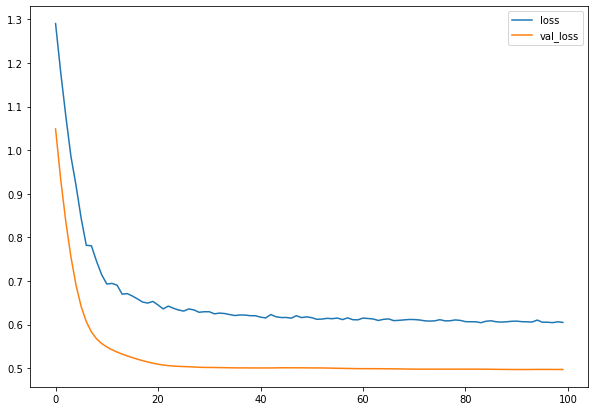

In [82]:
losses.plot()

In [83]:
y_hat = model.predict(X_test)

In [84]:
mean_absolute_error(y_test,y_hat)

0.5301867220337368

In [85]:
mean_squared_error(y_test, y_hat)

0.49681089501349496

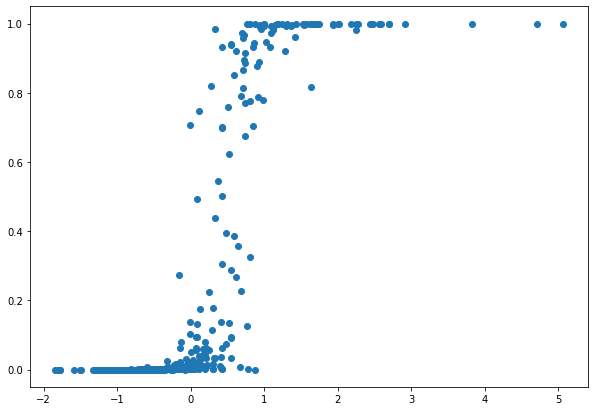

In [87]:
# Predicted values vs Actual Values
plt.scatter(y_test, y_hat)